In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#Read path
file_path = Path("myopia.csv")
mypoic_df = pd.read_csv(file_path)
mypoic_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


## Part 1: Prepare the Data

In [3]:
# Column names
mypoic_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
 # There were 81 myopic children samples and 537 non-myopic children samples
mypoic_df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [5]:
#Remove the "MYOPIC" column from the dataset.
myopic_df2 = mypoic_df.drop("MYOPIC", axis=1)
myopic_df2

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopic_df2)
scaled_data = pd.DataFrame(scaler.fit_transform(myopic_df2))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


In [7]:
scaled_data.shape

(618, 14)

## Part 2: Apply Dimensionality Reduction

In [8]:
#Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)
pca_transformed_data = pd.DataFrame(pca.fit_transform(scaled_data))
pca_transformed_data

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [9]:
pca_transformed_data.shape

(618, 10)

In [10]:
tsne = TSNE(learning_rate=500)
transformed_features = tsne.fit_transform(pca_transformed_data)
tsne_df = pd.DataFrame(transformed_features)
tsne_df

,0,1
0,17.666397,-5.588418
1,-12.189013,-14.906898
2,-0.842958,20.764816
3,-28.337376,5.304184
4,13.790415,4.233038
...,...,...
613,7.448150,-11.388407
614,-12.538563,-14.468694
615,-14.246246,-14.445239
616,-10.684456,20.487955


In [11]:
myopic_df2["x"] = transformed_features[:,0]
myopic_df2["y"] = transformed_features[:,1]
myopic_df2["class"] = mypoic_df["MYOPIC"]

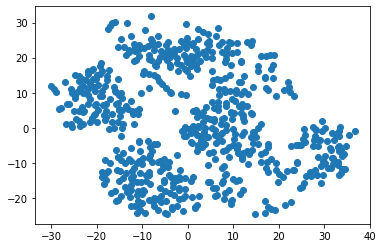

In [12]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(myopic_df2["x"], myopic_df2["y"])
plt.show()

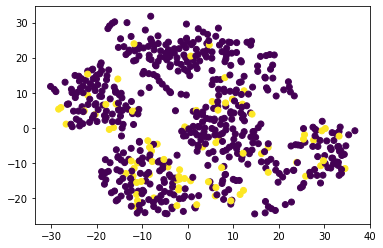

In [13]:
plt.scatter(myopic_df2["x"], myopic_df2["y"], c=myopic_df2["class"])
plt.show()

Some clusters showed up, as i increased the learning rate (about 4 clusters). However they were not as distinct.

## Part 3: Perform a Cluster Analysis with K-means

In [14]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopic_df2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\chisi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,512617.442669
1,2,331114.906076
2,3,261392.451644
3,4,218147.154397
4,5,191478.435385


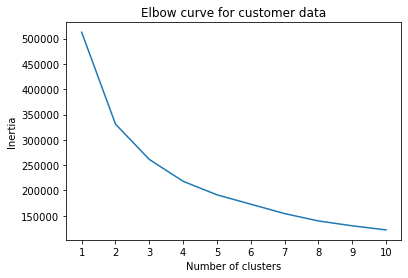

In [15]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [16]:
 def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [29]:
# First Elbow at 2
clusters = get_clusters(2, myopic_df2)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,17.666397,-5.588418,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-12.189013,-14.906898,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-0.842958,20.764816,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-28.337376,5.304184,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,13.790415,4.233038,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,7.448150,-11.388407,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-12.538563,-14.468694,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-14.246246,-14.445239,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-10.684456,20.487955,0


In [30]:
def show_clusters(myopic_df2):
    plt.scatter(myopic_df2['x'], myopic_df2['y'], c=myopic_df2['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

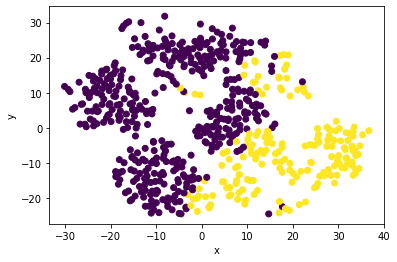

In [31]:
show_clusters(clusters)

In [32]:
# Second Elbow at 3
clusters = get_clusters(3, myopic_df2)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,17.666397,-5.588418,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-12.189013,-14.906898,2
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-0.842958,20.764816,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-28.337376,5.304184,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,13.790415,4.233038,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,7.448150,-11.388407,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-12.538563,-14.468694,2
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-14.246246,-14.445239,2
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-10.684456,20.487955,1


In [33]:
def show_clusters(myopic_df2):
    plt.scatter(myopic_df2['x'], myopic_df2['y'], c=myopic_df2['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

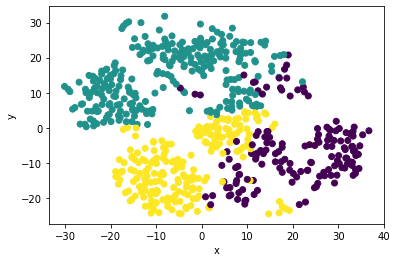

In [34]:
show_clusters(clusters)

In [35]:
#Final Elbow at 4 
clusters = get_clusters(4, myopic_df2)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,17.666397,-5.588418,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-12.189013,-14.906898,2
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-0.842958,20.764816,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-28.337376,5.304184,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,13.790415,4.233038,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,7.448150,-11.388407,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-12.538563,-14.468694,2
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-14.246246,-14.445239,2
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-10.684456,20.487955,0


In [36]:
def show_clusters(myopic_df2):
    plt.scatter(myopic_df2['x'], myopic_df2['y'], c=myopic_df2['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

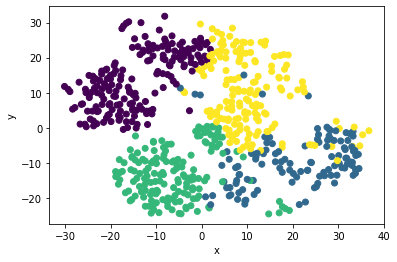

In [37]:
show_clusters(clusters)

In [38]:
# Prediction Elbow at 5
clusters = get_clusters(5, myopic_df2)
clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,x,y,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,17.666397,-5.588418,3
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,-12.189013,-14.906898,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-0.842958,20.764816,4
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,-28.337376,5.304184,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,13.790415,4.233038,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,7.448150,-11.388407,3
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,-12.538563,-14.468694,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,-14.246246,-14.445239,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,-10.684456,20.487955,0


In [39]:
def show_clusters(myopic_df2):
    plt.scatter(myopic_df2['x'], myopic_df2['y'], c=myopic_df2['class'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

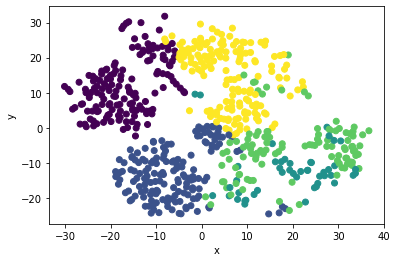

In [40]:
show_clusters(clusters)

## Part 4: Make a Recommendation

Based on the above plots, i think the patients can be clustered(albeit not distinctly).

However, in event that the cluster is being considered, a cluster of 3 seems the most ideal.